In [2]:
import numpy as np 
import pandas as pd
import os 
from pathlib import Path
import cv2
import matplotlib.pyplot as plt 
import os
from PIL import Image
import keras
import tensorflow
from keras.utils import img_to_array
from tensorflow.keras.utils import load_img
from keras.utils import np_utils
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,GlobalAveragePooling2D,Activation,BatchNormalization,Dropout
from tensorflow.keras import Sequential,backend,optimizers

In [4]:
normal_data = os.listdir('pneumonia/chest_xray/data/NORMAL')
infected_data = os.listdir('pneumonia/chest_xray/data/PNEUMONIA')
data = []
labels = []

for img in normal_data:
    try:
        img_read = plt.imread('pneumonia/chest_xray/data/NORMAL/' + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        if img_array.shape == (224, 224,1):
            data.append(img_array)
            labels.append(0)
       
    except:
        None
        
for img in infected_data:
    try:
        img_read = plt.imread('pneumonia/chest_xray/data/PNEUMONIA/' + img)
        img_resize = cv2.resize(img_read, (224, 224))
        img_array = img_to_array(img_resize)
        if img_array.shape == (224, 224,1):
            data.append(img_array)
            labels.append(1)
       
    except:
        None

 

NORMAL Sample:



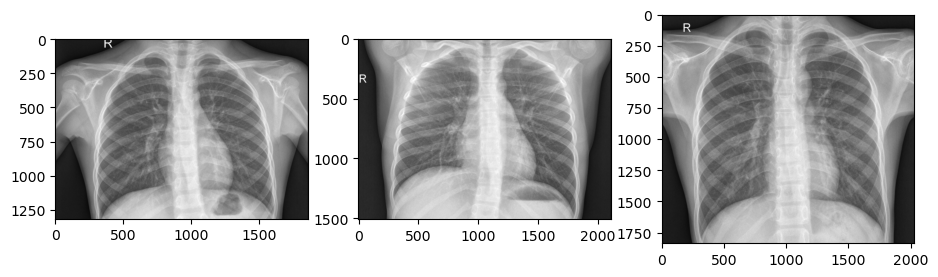

INFECTED Sample:



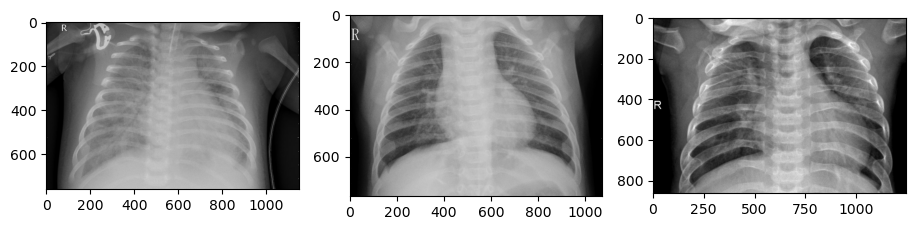

In [5]:
print("NORMAL Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('pneumonia/chest_xray/data/NORMAL/'+ normal_data[i])
    plt.imshow(img)
plt.show()

print("INFECTED Sample:\n")
plt.figure(figsize = (15,15))
for i in range(3):
    plt.subplot(4, 4, i+1)
    img = cv2.imread('pneumonia/chest_xray/data/PNEUMONIA/'+ infected_data[i])
    plt.imshow(img)
plt.show()

In [6]:
image_data = np.array(data)/255
labels = np.array(labels)
print("image_data:",len(image_data))
print("labels:",len(labels))

image_data: 5556
labels: 5556


In [8]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.25,random_state = 0)

print("X_train:",len(X_train))
print("X_test:",len(X_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

X_train: 4167
X_test: 1389
y_train: 4167
y_test: 1389


In [9]:
model = Sequential()

# Add convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history=model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
131/131 [==============================] - 137s 1s/step - loss: 0.2453 - accuracy: 0.9042
Epoch 2/20
131/131 [==============================] - 134s 1s/step - loss: 0.1530 - accuracy: 0.9453
Epoch 3/20
131/131 [==============================] - 133s 1s/step - loss: 0.1380 - accuracy: 0.9484
Epoch 4/20
131/131 [==============================] - 135s 1s/step - loss: 0.1174 - accuracy: 0.9585
Epoch 5/20
131/131 [==============================] - 137s 1s/step - loss: 0.1062 - accuracy: 0.9594
Epoch 6/20
131/131 [==============================] - 155s 1s/step - loss: 0.0939 - accuracy: 0.9630
Epoch 7/20
131/131 [==============================] - 179s 1s/step - loss: 0.0791 - accuracy: 0.9719
Epoch 8/20
131/131 [==============================] - 164s 1s/step - loss: 0.0754 - accuracy: 0.9729
Epoch 9/20
131/131 [==============================] - 179s 1s/step - loss: 0.0686 - accuracy: 0.9738
Epoch 10/20
131/131 [==============================] - 175s 1s/step - loss: 0.0487 - accura

In [14]:
y_pred=model.predict(X_test)

44/44 [==============================] - 14s 303ms/step


In [15]:
y_pred=y_pred.round().flatten()
y_pred,y_test

(array([1., 1., 0., ..., 1., 1., 0.], dtype=float32),
 array([1, 1, 0, ..., 1, 1, 0]))

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9632829373650108